In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
display(iris_df.info())
display(iris_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Task
Analyze the iris dataset with code and figures to explore its features and assess its cleanliness.

## Import necessary libraries

### Subtask:
Import libraries for plotting such as `matplotlib.pyplot` and `seaborn`.


**Reasoning**:
Import the required plotting libraries, matplotlib.pyplot and seaborn.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Visualize the data

### Subtask:
Create visualizations to explore the distributions of the features and the relationships between them. Histograms and scatter plots are good choices for this dataset.


**Reasoning**:
Create histograms for each feature and a pairplot to visualize the distributions and relationships between features.



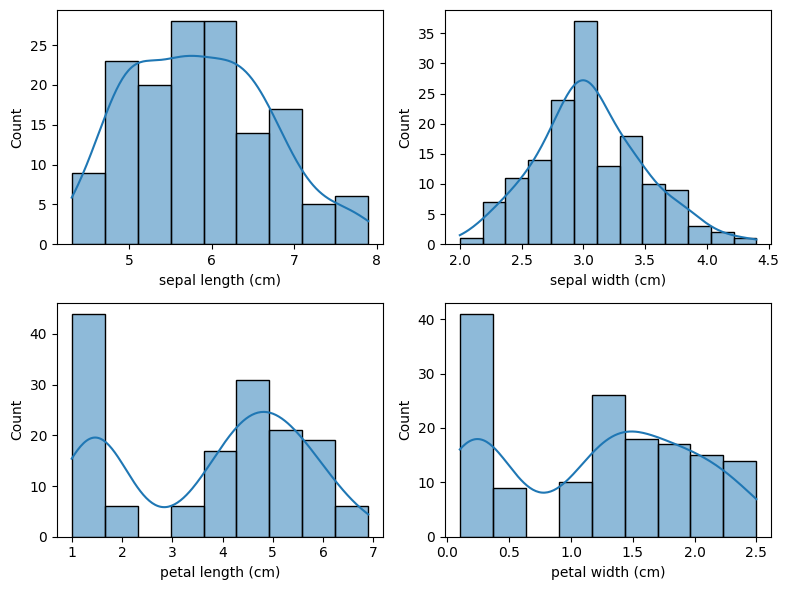

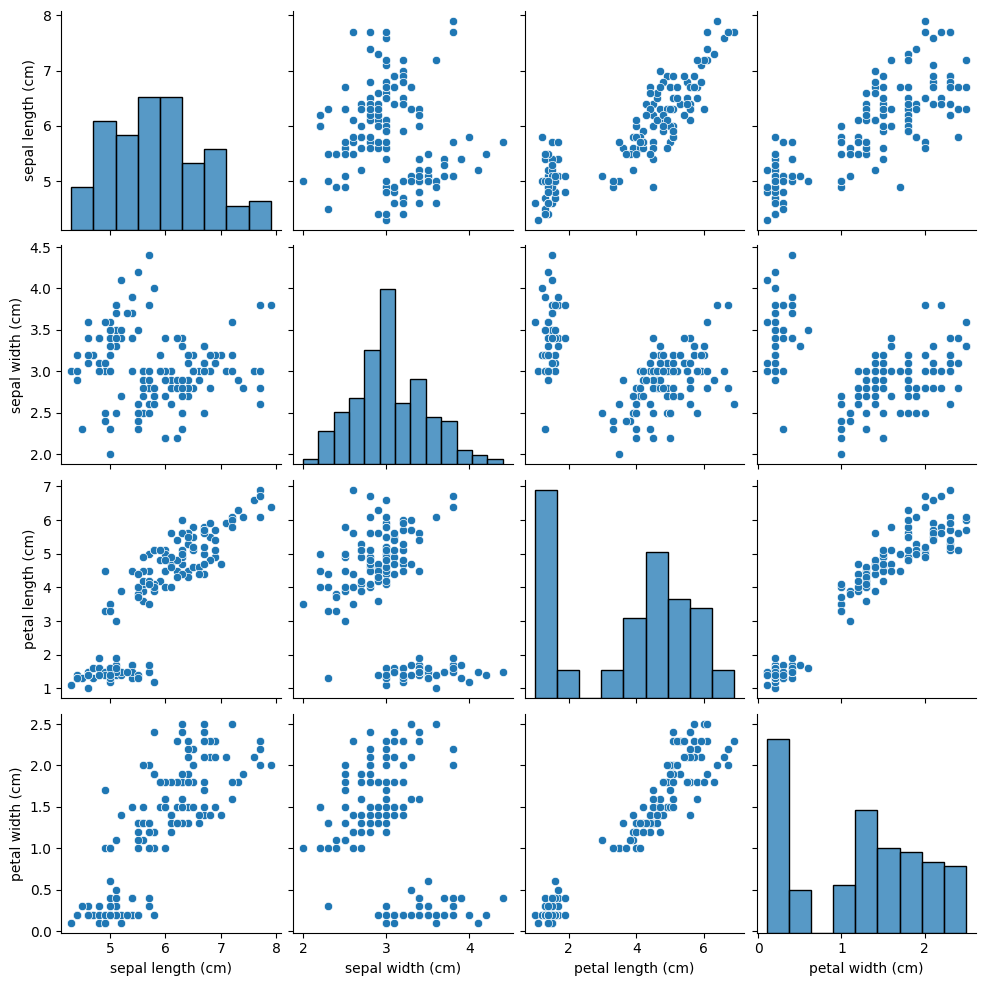

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
for i, col in enumerate(iris_df.columns):
    sns.histplot(data=iris_df, x=col, ax=axes[i//2, i%2], kde=True)
plt.tight_layout()
plt.show()

sns.pairplot(iris_df)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris.target, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [6]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model (e.g., using accuracy)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy}")

Accuracy of the SVM model: 1.0


## MNIST dataset


In [7]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)

Data type of x_train: uint8


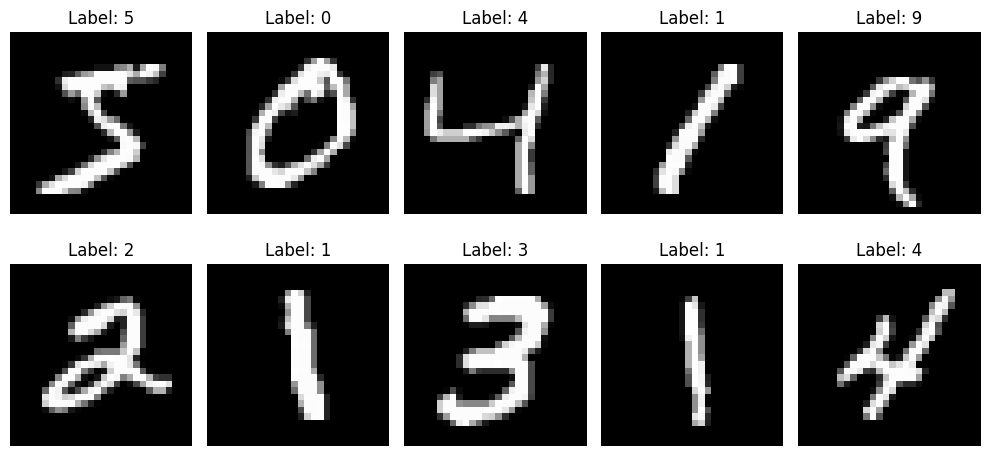

In [8]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

print("\nData type of x_train:", x_train.dtype)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

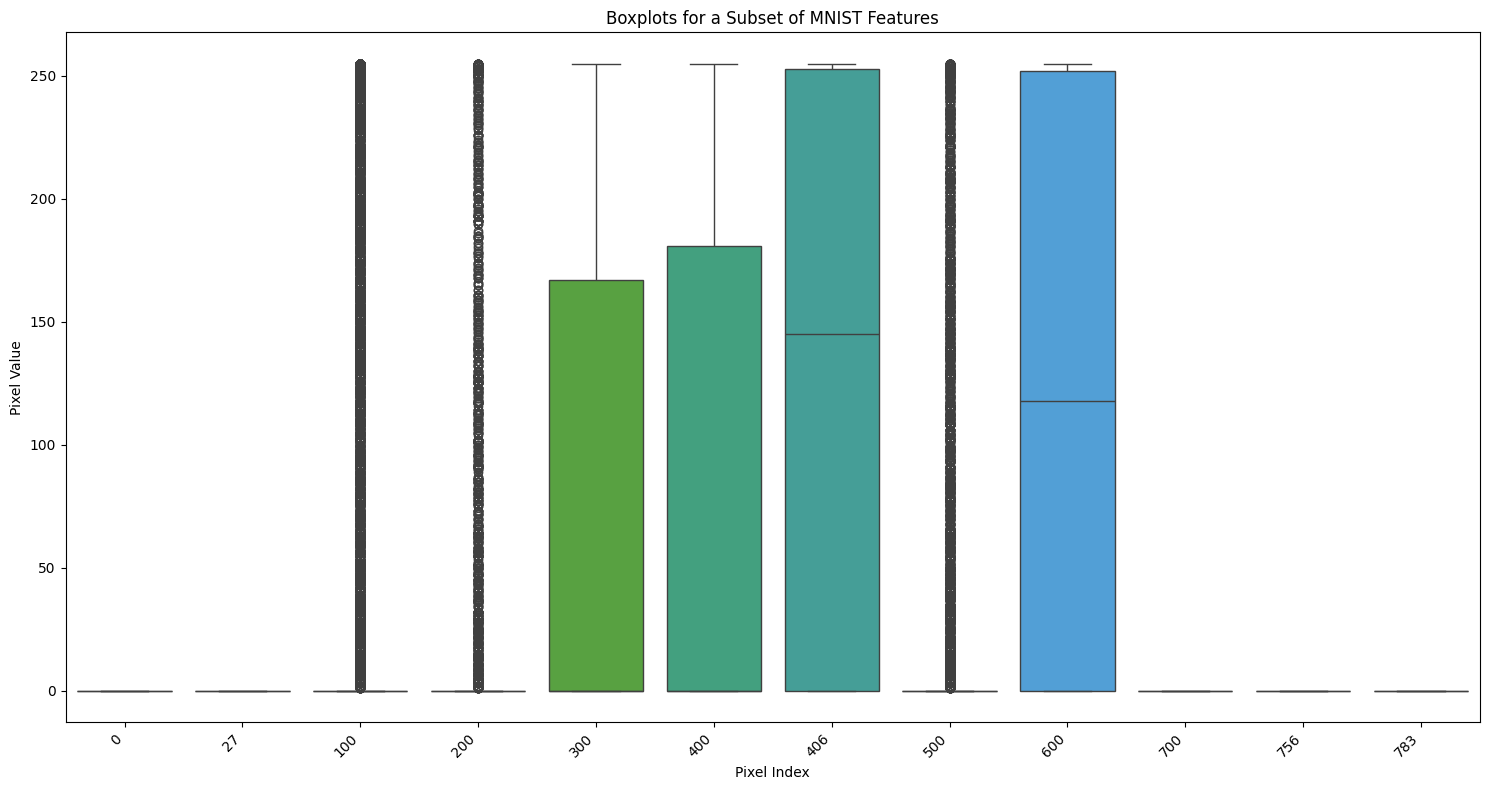

In [9]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
mnist_df = pd.DataFrame(x_train_flat)

# Select a subset of columns for visualization.
# Choosing columns from corners, center, and edges.
selected_columns = [0, 27, 28 * 14 + 14, 28 * 27, 28 * 28 - 1, 100, 200, 300, 400, 500, 600, 700]
subset_df = mnist_df[selected_columns]

# Create boxplots for the selected subset of features
plt.figure(figsize=(15, 8))
sns.boxplot(data=subset_df)
plt.title('Boxplots for a Subset of MNIST Features')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

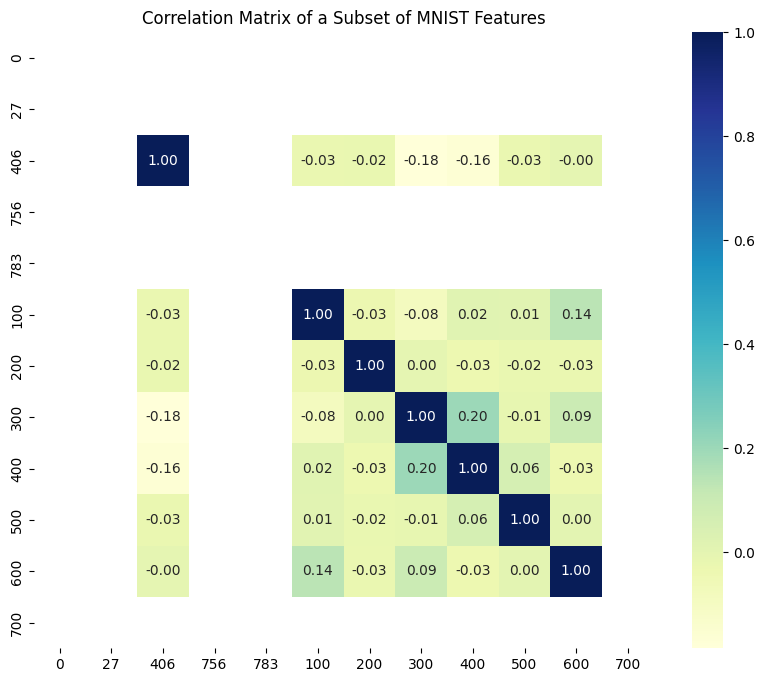

In [10]:
correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Correlation Matrix of a Subset of MNIST Features')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flatten the MNIST images for SVM
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Initialize the SVM model
svm_model_mnist = SVC(kernel='linear')

# Train the model on the training data
print("Training SVM model on MNIST data...")
svm_model_mnist.fit(x_train_flat, y_train)
print("Training complete.")

# Make predictions on the test data
print("Making predictions on test data...")
y_pred_mnist = svm_model_mnist.predict(x_test_flat)
print("Predictions complete.")

# Evaluate the model
accuracy_mnist = accuracy_score(y_test, y_pred_mnist)
print(f"Accuracy of the SVM model on MNIST: {accuracy_mnist}")

Training SVM model on MNIST data...
